In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)
    
    

input
input\evaluation
input\training


In [2]:
solved_id=set()
vals_id=set()

In [3]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

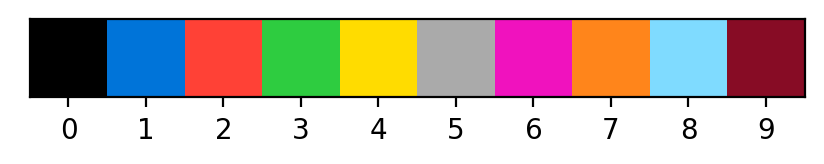

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:
#color map
def getObjectHash(pixmap):
    pixmap=np.array(pixmap)
    flat = pixmap.flatten().astype(np.bool)
    mult = np.array([2 ** x for x in range(len(flat))])
    return np.sum(flat * mult)
#經測試沒有overflow問題
def groupByColor(pixmap):
    pixmap=np.array(pixmap)
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]
def checkColorMap(a,b):
    c = 1
    inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
    out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
    c *= inp_hashes == out_hashes
    return bool(c)
def findColorMap(a,b):
    colormap = {}
    a1=np.array(a).flatten()
    b1=np.array(b).flatten()

    for col, idx in zip(*np.unique(a1,return_index=True)):
        if col in colormap.keys(): continue
        colormap[col] = b1[idx]
    return colormap
def applyColorMap(pixmap, colormap):
    
    a1=np.array(pixmap)
    for i in range(len(a1)):
        for j in range(len(a1[0])):
            a1[i][j]=colormap[pixmap[i][j]]
    return a1.tolist()

In [7]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [8]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [9]:
a=np.array(Trains[2]["train"][0]["output"])
a.shape

(9, 3)

In [10]:
#task=Trains[j]["train"]
def has_vertical_split0(task):
    same_mid_color=set()
    for i in range(len(task)):
        a=task[i]["input"]
        a=np.array(a)
        b=task[i]["output"]
        b=np.array(b)
        
        if a.shape[1]%2==0:
            return False
        mid=int(np.floor(a.shape[1] / 2))
        mid_color = np.unique(a[:,mid])
        if mid_color.shape[0] > 1:
            return False
        mid_color = mid_color[0]
        same_mid_color.add(mid_color)
        if len(same_mid_color)>1:
            return False
        if b.shape[1]!=mid or b.shape[0]!=a.shape[0]:
            return False
    return True
        

In [11]:
#task=Trains[j]["train"]
def has_horizontal_split0(task):
    same_mid_color=set()
    for i in range(len(task)):
        a=task[i]["input"]
        a=np.array(a)
        b=task[i]["output"]
        b=np.array(b)
        
        if a.shape[0]%2==0:
            return False
        mid=int(np.floor(a.shape[0] / 2))
        mid_color = np.unique(a[mid,:])
        if mid_color.shape[0] > 1:
            return False
        mid_color = mid_color[0]
        same_mid_color.add(mid_color)
        if len(same_mid_color)>1:
            return False
        if b.shape[0]!=mid or b.shape[1]!=a.shape[1]:
            return False
    return True

In [12]:
def vertical_split0(a,b):
    a=np.array(a)
    b=np.array(b)
    if a.shape[1]%2!=0 or a.shape[1]<2:
        return False
    if a.shape[1]!= b.shape[1]*2  or a.shape[0]!=b.shape[0]:
        return False
    
    mid=int(np.floor(a.shape[1] / 2))
    return a[:,:mid].tolist(),a[:,mid:].tolist()
    
    

In [13]:
def horizontal_split0(a,b):
    
    a=np.array(a)
    b=np.array(b)

    if a.shape[0]%2!=0 or a.shape[0]<2:
        return False
    if a.shape[0]!= b.shape[0]*2 or a.shape[1]!=b.shape[1]:
        return False
    
    mid=int(np.floor(a.shape[0] / 2))

    return a[:mid,:].tolist(),a[mid:,:].tolist()

In [14]:
#task=Trains[j]["train"]
def vertical_split(a,b):
    a=np.array(a)
    b=np.array(b)
    if a.shape[1]%2==0:
        return False
    mid=int(np.floor(a.shape[1] / 2))
    mid_color = np.unique(a[:,mid])
    if mid_color.shape[0] > 1:
        return False
#     mid_color = mid_color[0]
#     same_mid_color.add(mid_color)
#     if len(same_mid_color)>1:
#         return False
    if b.shape[1]!=mid or b.shape[0]!=a.shape[0]:
        return False
    return a[:,:mid].tolist(),a[:,mid+1:].tolist()
        
    

In [15]:
#task=Trains[j]["train"]
def horizontal_split(a,b):
    
    a=np.array(a)
    b=np.array(b)

    if a.shape[0]%2==0:
        return False
    mid=int(np.floor(a.shape[0] / 2))
    mid_color = np.unique(a[mid,:])
    if mid_color.shape[0] > 1:
        return False
#     mid_color = mid_color[0]
#     same_mid_color.add(mid_color)
#     if len(same_mid_color)>1:
#         return False
    if b.shape[0]!=mid or b.shape[1]!=a.shape[1]:
        return False
    return a[:mid,:].tolist(),a[mid+1:,:].tolist()

In [16]:
for i in range(400):
    task=Trains[i]["train"]
    if has_vertical_split0(task) or has_horizontal_split0(task):
        print(i)
        if has_horizontal_split0(task):
            print(has_horizontal_split0(task))
        else:
            print(has_vertical_split0(task))

5
True
25
True
71
True
143
True
235
True
317
True
359
True
371
True
385
True


In [17]:
def logitic_And(a,b):
    a=np.array(a)
    b=np.array(b)
    c=np.zeros(a.shape)
    if a.shape!=b.shape:
        return -1
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j]!=0 and a[i][j]==b[i][j]:
                c[i][j]=a[i][j]
    return c
    

In [18]:
def logitic_And_01(a,b):
    a=np.array(a)
    b=np.array(b)
    a=np.where(a,1,0)
    b=np.where(b,1,0)
    
    c=np.zeros(a.shape)
    if a.shape!=b.shape:
        return -1
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j]!=0 and a[i][j]==b[i][j]:
                c[i][j]=a[i][j]
    return c

In [19]:
def logitic_Or(a,b):
    a=np.array(a)
    b=np.array(b)
    c=np.zeros(a.shape)
    if a.shape!=b.shape:
        return -1
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j]==0 and b[i][j]!=0 :
                c[i][j]=b[i][j]
            elif a[i][j]!=0 and b[i][j]==0:
                c[i][j]=a[i][j]
            elif a[i][j]!=0 and a[i][j]==b[i][j]:
                c[i][j]=a[i][j]
    return c

In [20]:
def logitic_Or_01(a,b):
    a=np.array(a)
    b=np.array(b)
    a=np.where(a,1,0)
    b=np.where(b,1,0)
    c=np.zeros(a.shape)
    if a.shape!=b.shape:
        return -1
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j]==0 and b[i][j]!=0 :
                c[i][j]=b[i][j]
            elif a[i][j]!=0 and b[i][j]==0:
                c[i][j]=a[i][j]
            elif a[i][j]!=0 and a[i][j]==b[i][j]:
                c[i][j]=a[i][j]
    return c

In [21]:
def logitic_Xor(a,b):
    a=np.array(a)
    b=np.array(b)
    c=np.zeros(a.shape)
    if a.shape!=b.shape:
        return -1
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j]==0 and b[i][j]!=0 :
                c[i][j]=b[i][j]
            elif a[i][j]!=0 and b[i][j]==0:
                c[i][j]=a[i][j]
    return c

In [22]:
def logitic_Xor_01(a,b):
    a=np.array(a)
    b=np.array(b)
    a=np.where(a,1,0)
    b=np.where(b,1,0)
    c=np.zeros(a.shape)
    if a.shape!=b.shape:
        return -1
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j]==0 and b[i][j]!=0 :
                c[i][j]=b[i][j]
            elif a[i][j]!=0 and b[i][j]==0:
                c[i][j]=a[i][j]
    return c

In [23]:
#need color change
def logitic_Nor(a,b):
    a=np.array(a)
    b=np.array(b)
    c=np.zeros(a.shape)
    if a.shape!=b.shape:
        return -1
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i][j]==0 and b[i][j]==0:
                c[i][j]=1
    return c
    

In [24]:
# a b
# 1 1 1 
# 1 0 0
# 0 1 0
# 0 0 1
#這組合還未寫

In [25]:
#Transformations
def Vert(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[i][j] = 0+M[n-1-i][j]
    return ans.tolist()

def Hor(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[i][j] = 0+M[i][k-1-j]
    return ans.tolist()

def Rot1(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((k,n), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[j][i] = 0 + M[i][k-1-j]
    return ans.tolist()
            
def Rot2(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((k,n), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[j][i] = 0 + M[n-1-i][j]
    return ans.tolist()

In [26]:
logitic_map=[logitic_And,logitic_Or,logitic_Nor,logitic_Xor,logitic_And_01,logitic_Or_01,logitic_Xor_01]


In [27]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [28]:
def Apply_logitic(S, x, y):
    if S in logitic_map:
        x1 = Defensive_Copy(x)
        y1 = Defensive_Copy(y)
        z1 = S(x1,y1)
    return z1.tolist()

In [29]:

def Solve_logtic(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    for i in range(len(logitic_map)):
        S = logitic_map[i]
        solved = True
        m=0
        
        for x, y in zip(Input,Output):
    
            if vertical_split(x,y) or horizontal_split(x,y) or vertical_split0(x,y) or horizontal_split0(x,y):
            
                if horizontal_split(x,y):
                    a,b=horizontal_split(x,y)
                    b1=Vert(b)
                    mask=0
                    
                elif horizontal_split0(x,y):
                    a,b=horizontal_split0(x,y)
                    
                    b1=Vert(b)
                    mask=0
                elif vertical_split(x,y):
                    a,b=vertical_split(x,y)
                    b1=Hor(b)
                    mask=1
                    
                else:
                    a,b=vertical_split0(x,y)
                    b1=Hor(b)
                    mask=1
            
            else:
                return -1            
            #print(a,b)
            logitic_x=Apply_logitic(S,a,b)
            logitic_x1=Apply_logitic(S,a,b1)
            #print(logitic_x1)
            #color chage
            
            if checkColorMap(logitic_x,y) and logitic_x!=y:
                m=1
                colormap=findColorMap(logitic_x,y)
                logitic_x=applyColorMap(logitic_x,colormap)
            if checkColorMap(logitic_x1,y) and logitic_x1!=y:
                m=1
                colormap=findColorMap(logitic_x1,y)
                logitic_x1=applyColorMap(logitic_x1,colormap)
            
            
            if logitic_x!=y and logitic_x1!=y:
                solved=False
                break
                
            
        
        if solved==True:
            
            if logitic_x==y:
                if mask==0 and horizontal_split(Test_Case,y):
                    a,b=horizontal_split(Test_Case,y)
                elif  mask==0 and horizontal_split0(Test_Case,y):
                    a,b=horizontal_split0(Test_Case,y)
              
                elif  mask==1 and vertical_split(Test_Case,y) :
                    a,b=vertical_split(Test_Case,y) 
              
                elif  mask==1 and vertical_split0(Test_Case,y) :
                    a,b=vertical_split0(Test_Case,y)
                #187
                else:
                    return -1
                logitic_Test_Case=Apply_logitic(S,a,b)

                if m==1 :
                    logitic_Test_Case=applyColorMap(logitic_Test_Case,colormap)
                #to int
                logitic_Test_Case=[[int(s) for s in a]for a in logitic_Test_Case]

                return logitic_Test_Case
            else:
                if  mask==0 and horizontal_split(Test_Case,y):
                    a,b=horizontal_split(Test_Case,y)
                    b1=Vert(b)
                elif  mask==0 and horizontal_split0(Test_Case,y):
                    a,b=horizontal_split0(Test_Case,y)
                    b1=Vert(b)
                elif  mask==1 and vertical_split(Test_Case,y) :
                    a,b=vertical_split(Test_Case,y) 
                    b1=Hor(b)
                    
                elif mask==1 and vertical_split0(Test_Case,y) :
                    a,b=vertical_split0(Test_Case,y) 
                    b1=Hor(b)
                    
                else:
                    return -1
                    
                logitic_Test_Case=Apply_logitic(S,a,b1)

                if m==1 :
                    logitic_Test_Case=applyColorMap(logitic_Test_Case,colormap)
                #to int
                logitic_Test_Case=[[int(s) for s in a]for a in logitic_Test_Case]

                return logitic_Test_Case
    return -1
            
            

In [30]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [31]:
task = Trains[359]
basic_task = Create(task, 0)

Solve_logtic(basic_task)

[[0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [6, 1, 1, 1],
 [0, 0, 6, 6],
 [0, 1, 1, 1],
 [0, 0, 0, 1],
 [0, 0, 6, 1],
 [0, 0, 0, 6],
 [0, 0, 0, 0]]

In [32]:
# task = Trains[359]
# basic_task = Create(task, 0)
# basic_task

5 0


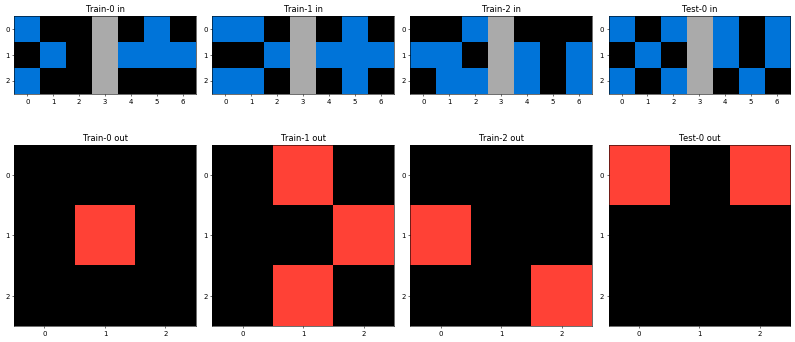

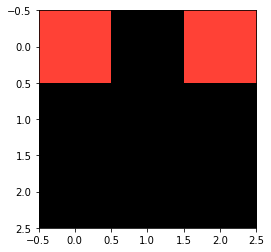

25 0


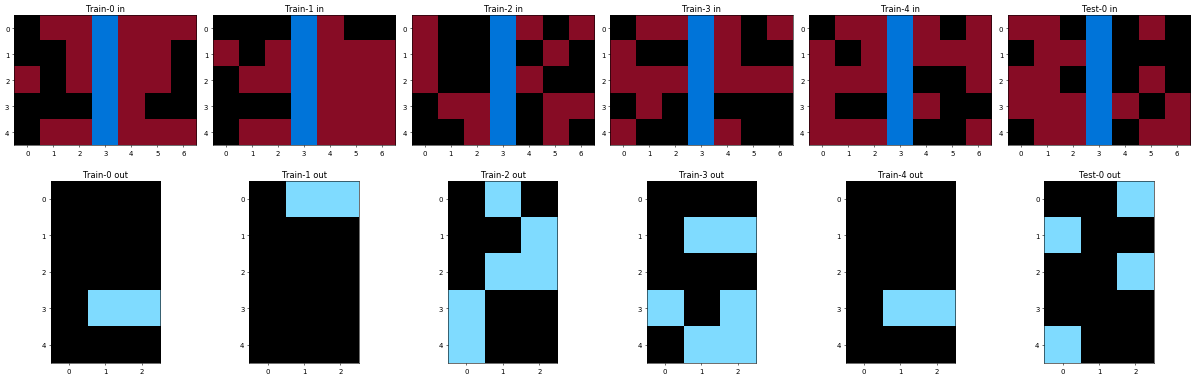

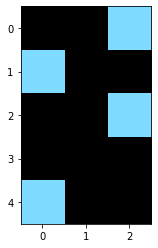

71 0


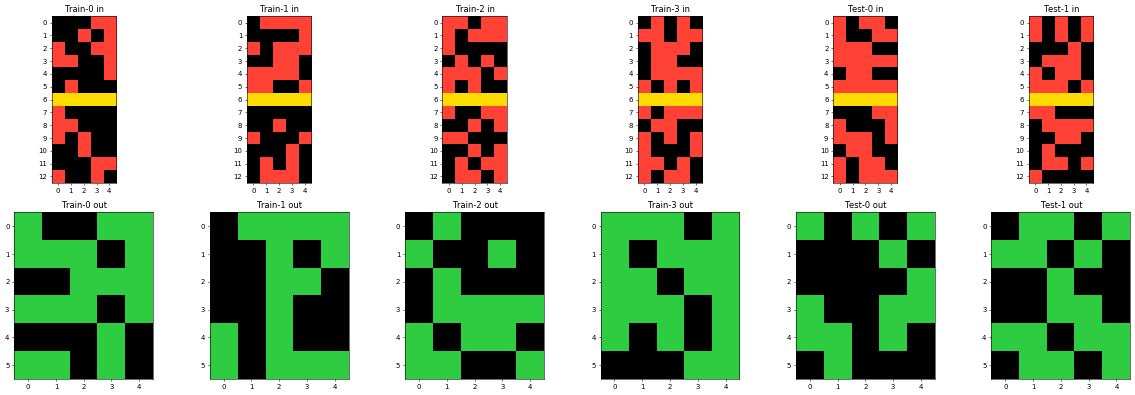

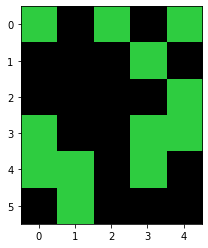

71 1


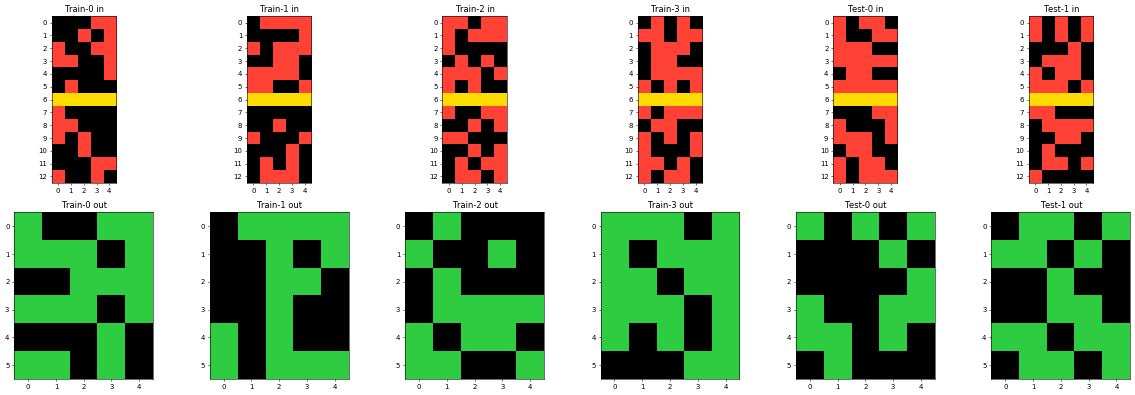

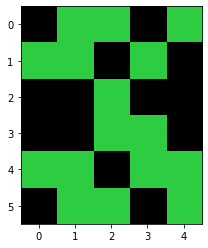

143 0


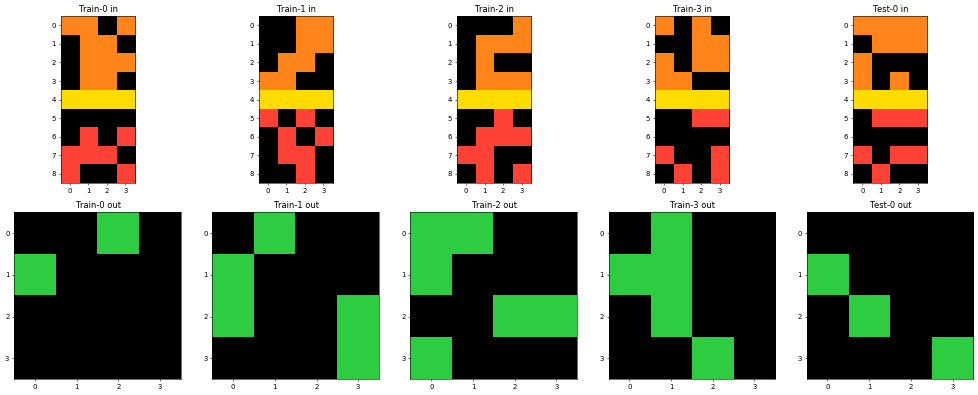

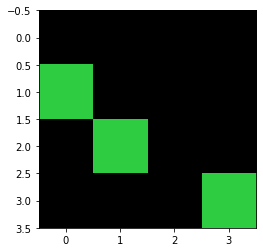

226 0


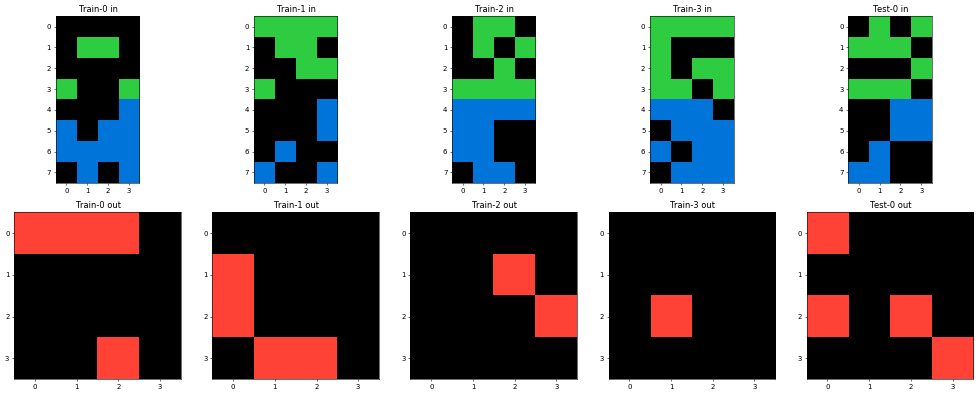

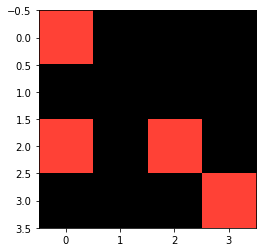

235 0


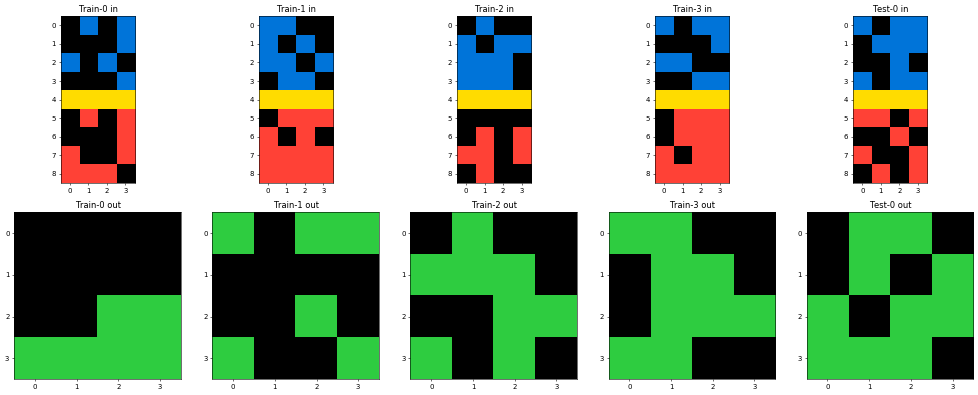

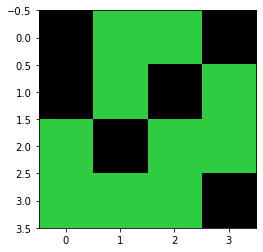

317 0


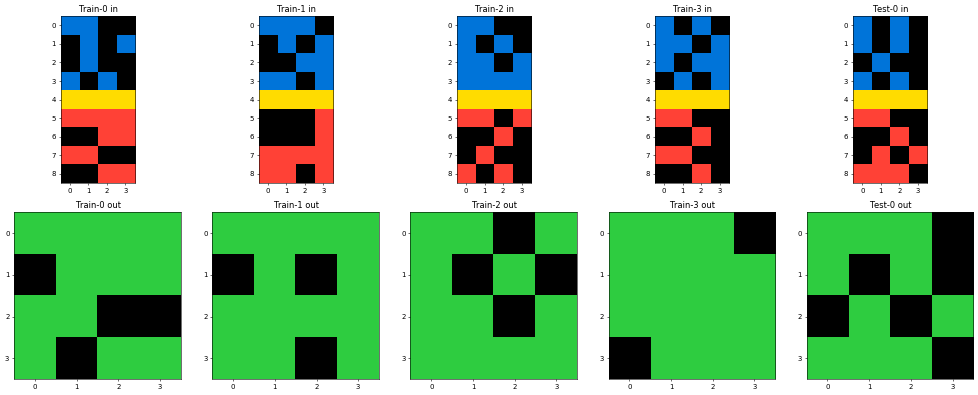

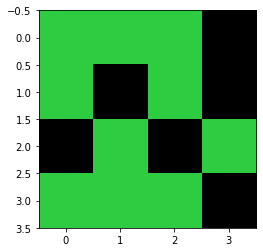

346 0


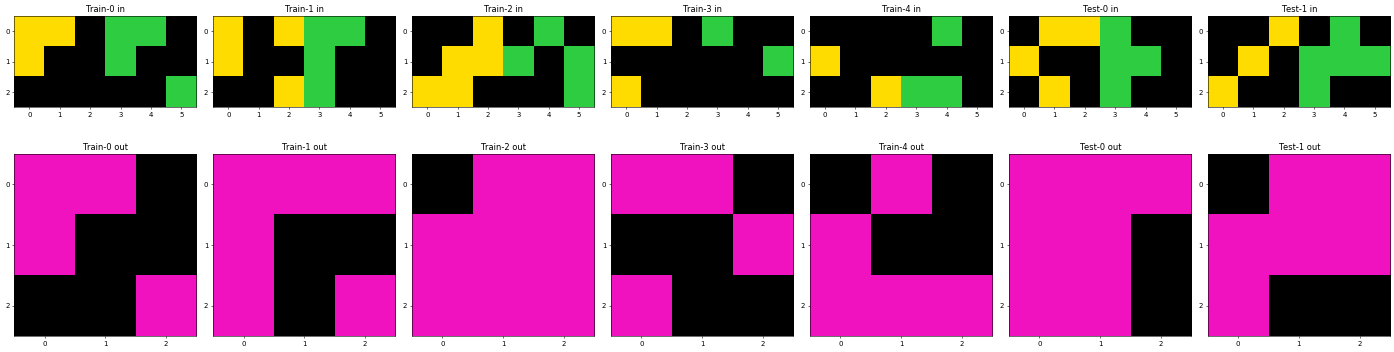

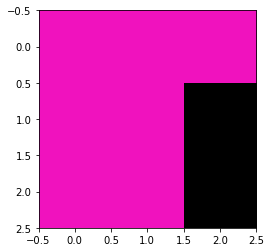

346 1


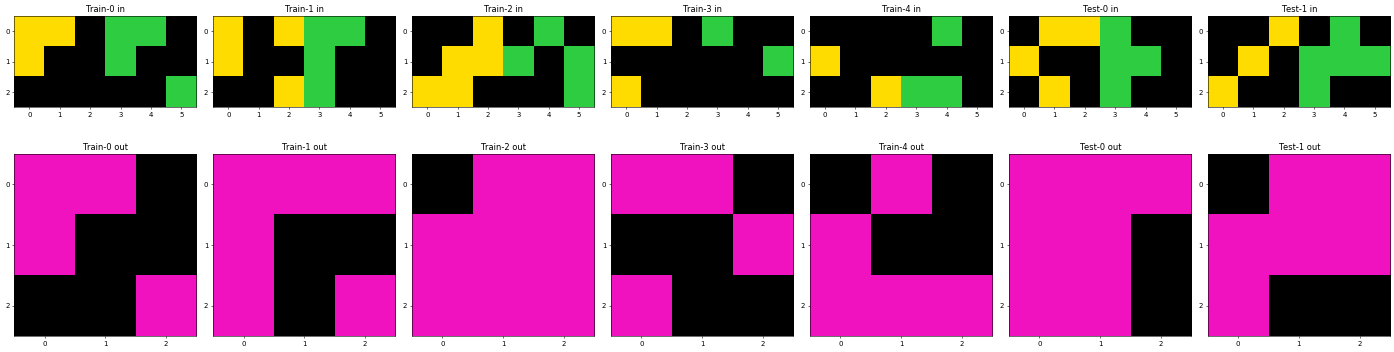

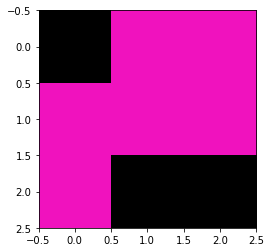

359 0


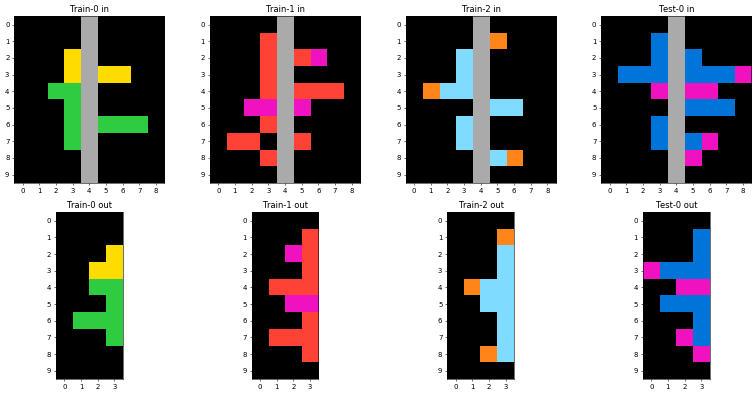

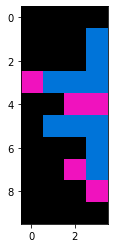

371 0


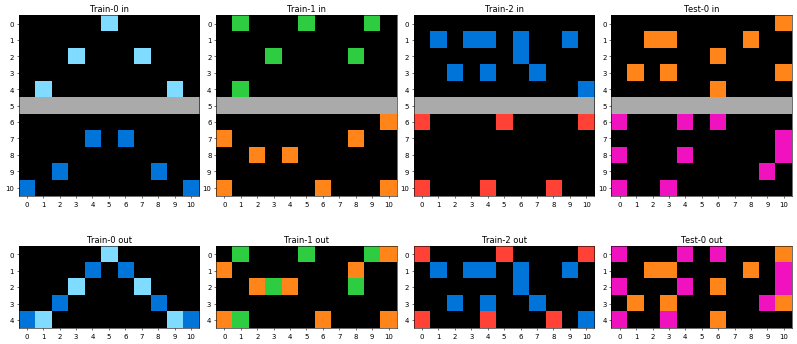

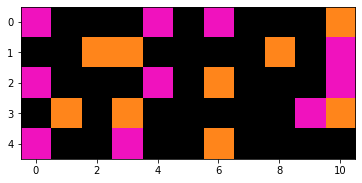

385 0


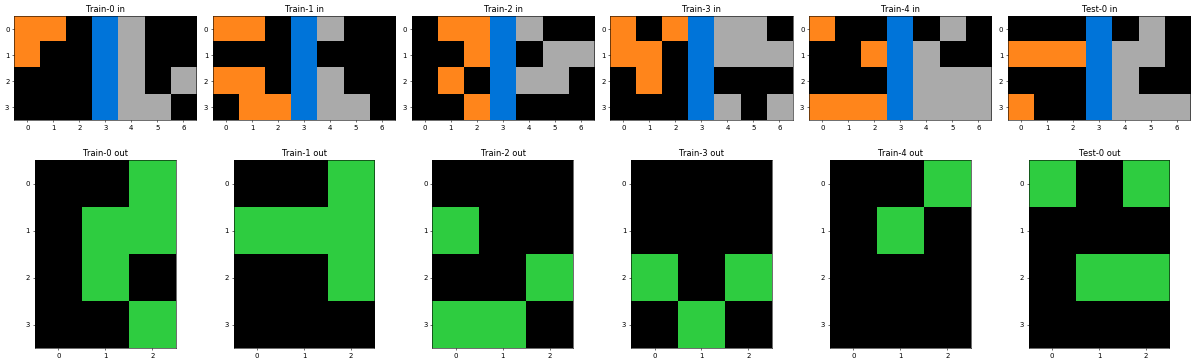

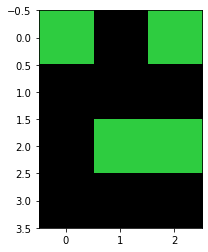

394 0


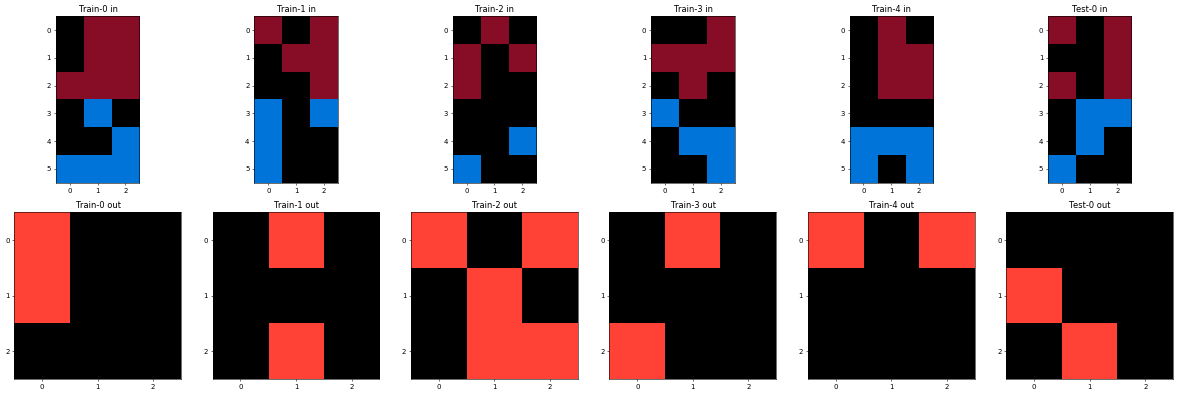

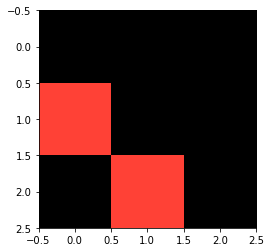

In [33]:

for i in range(400):
    task = Trains[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=Solve_logtic(basic_task)
       

        if a!=-1 and task['test'][j]['output'] == a:
            print(i,j)
            plot_task(task)
            plot_picture(a)
            solved_id.add(i)

In [34]:
solved_id

{5, 25, 71, 143, 226, 235, 317, 346, 359, 371, 385, 394}

In [35]:
len(solved_id)

12

In [36]:
#235 317 359
#a ,b不同顏色 OK
#鏡像

17 0


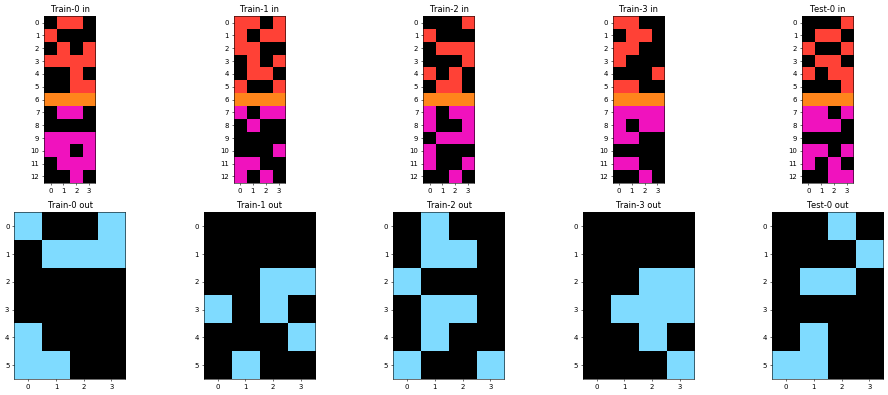

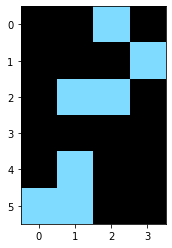

39 0


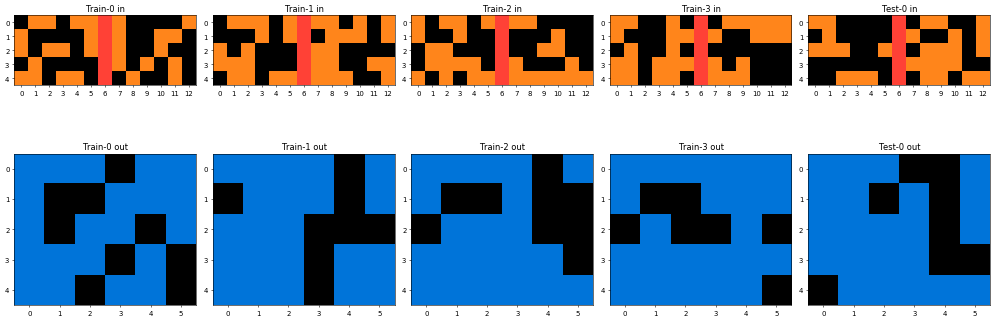

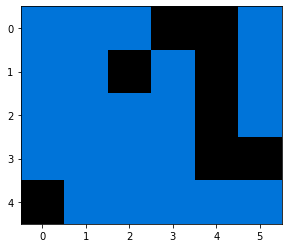

80 0


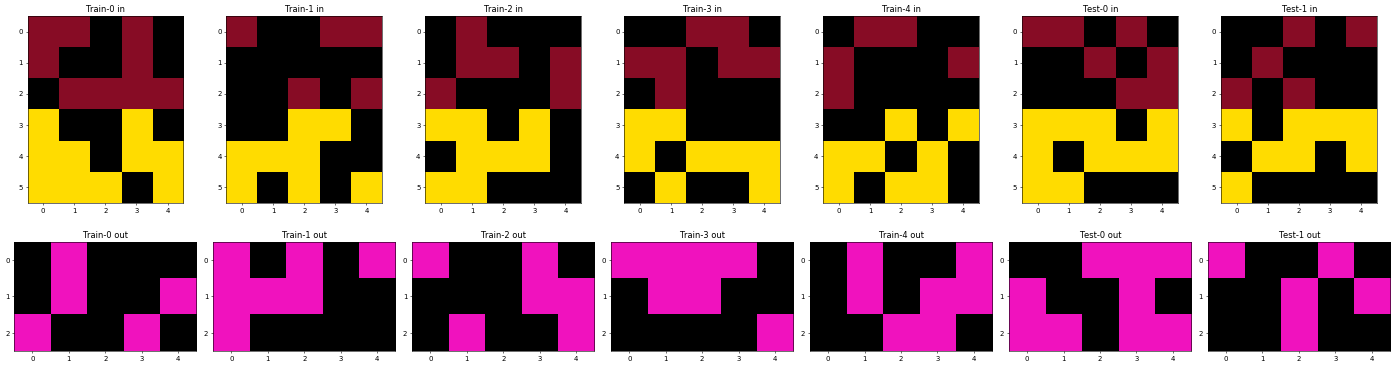

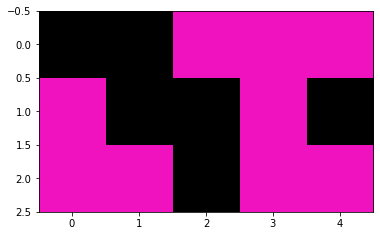

80 1


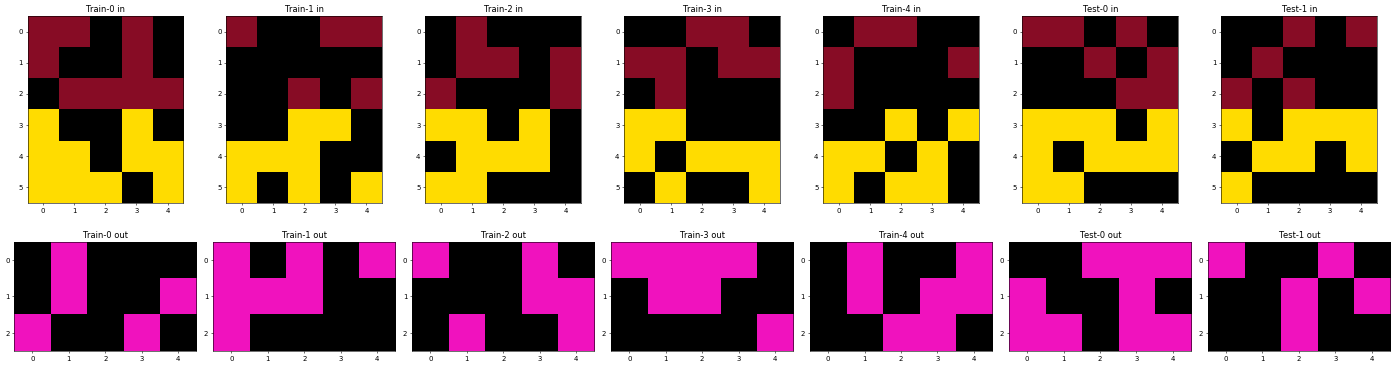

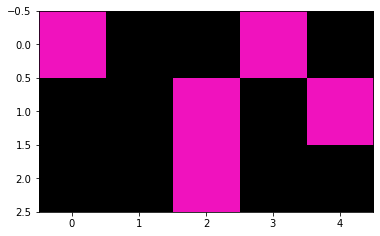

86 0


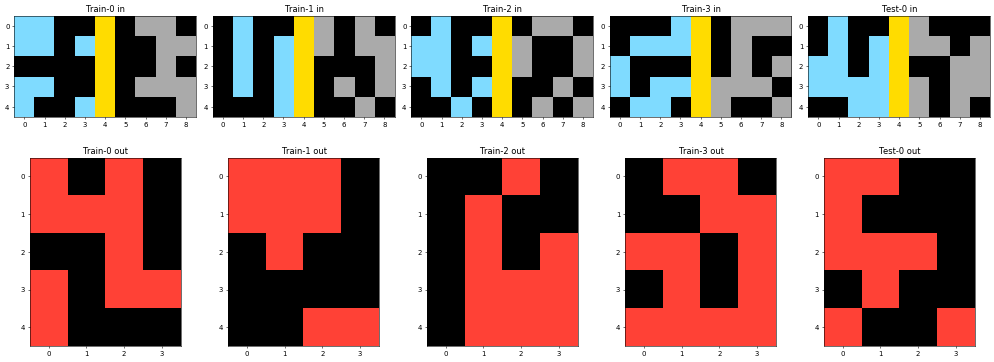

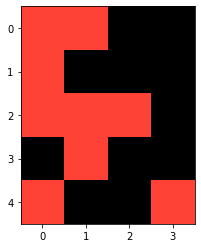

121 0


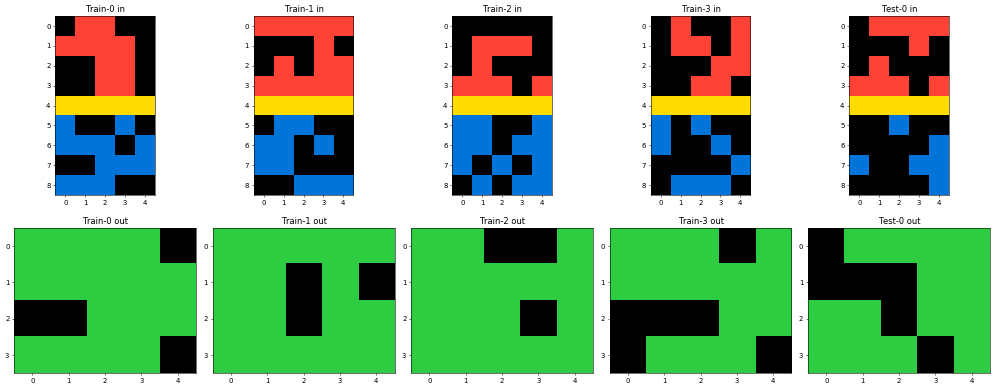

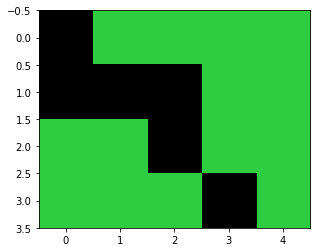

144 0


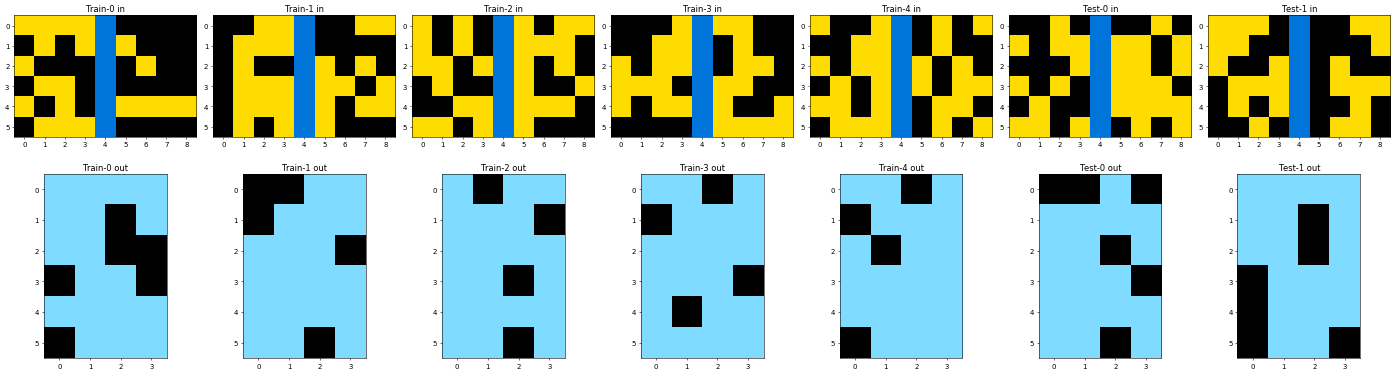

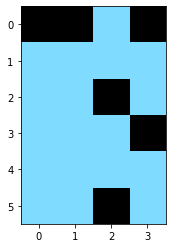

144 1


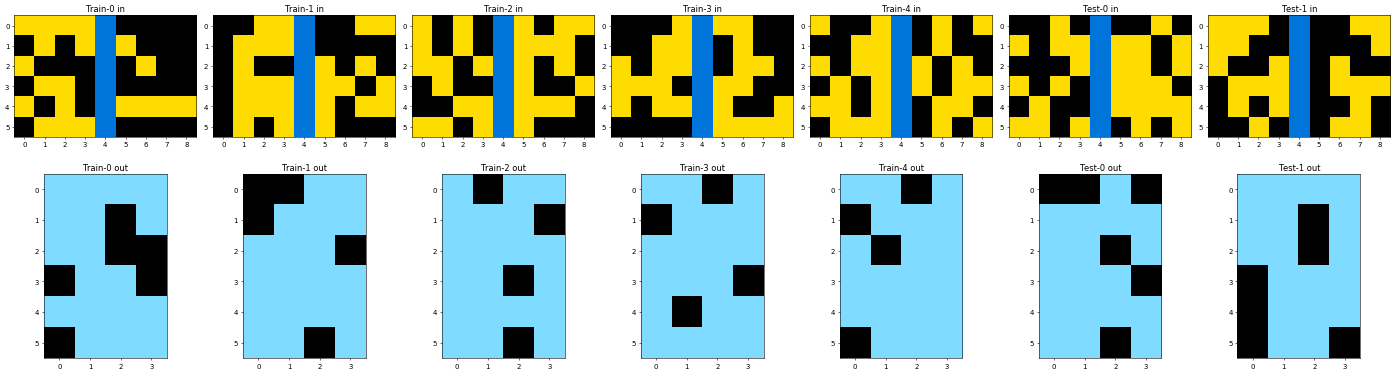

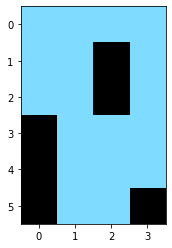

157 0


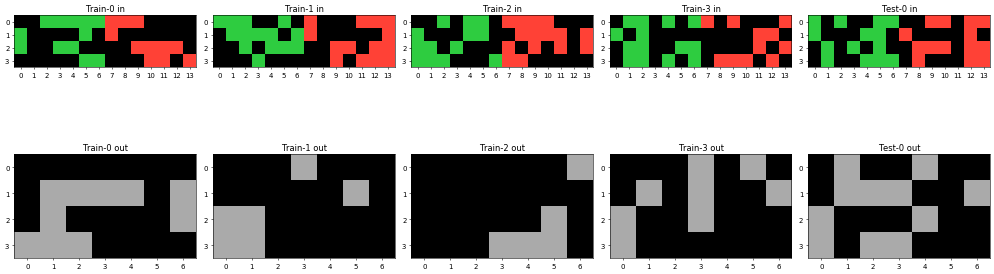

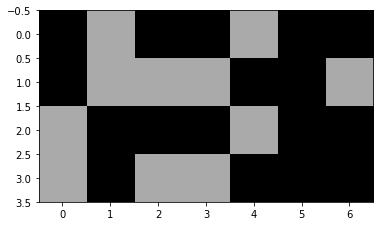

318 0


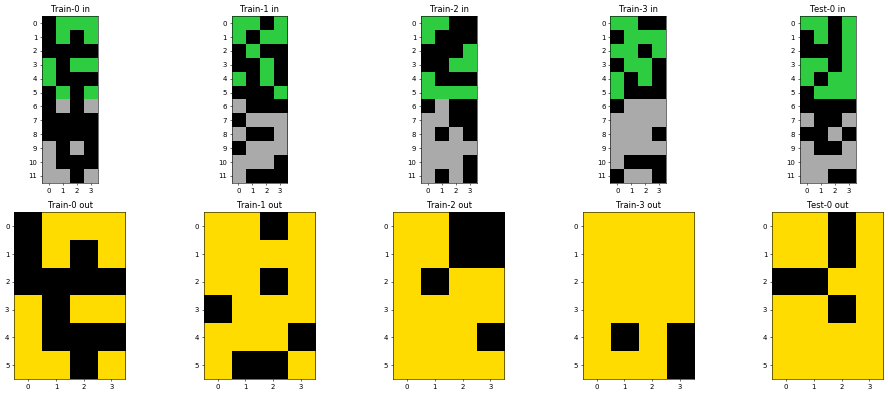

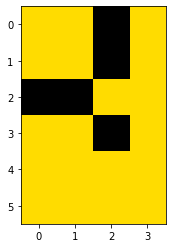

339 0


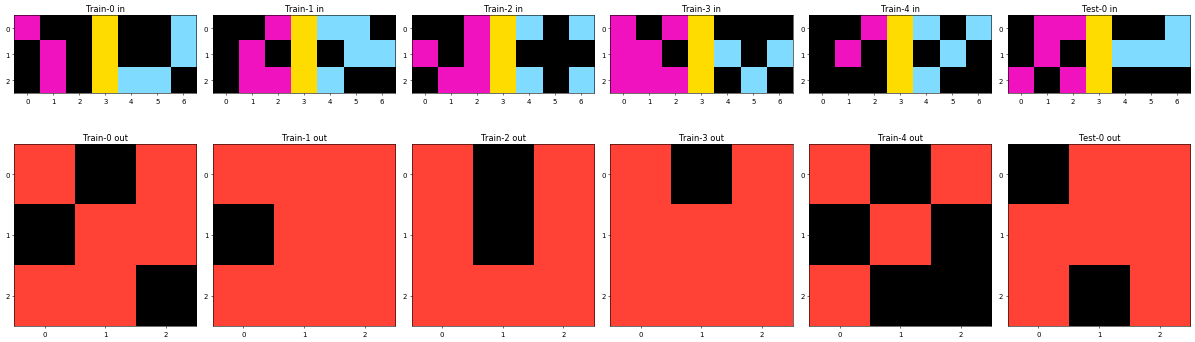

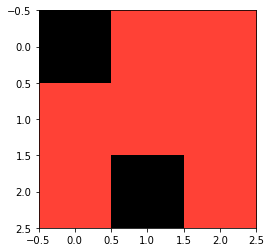

344 0


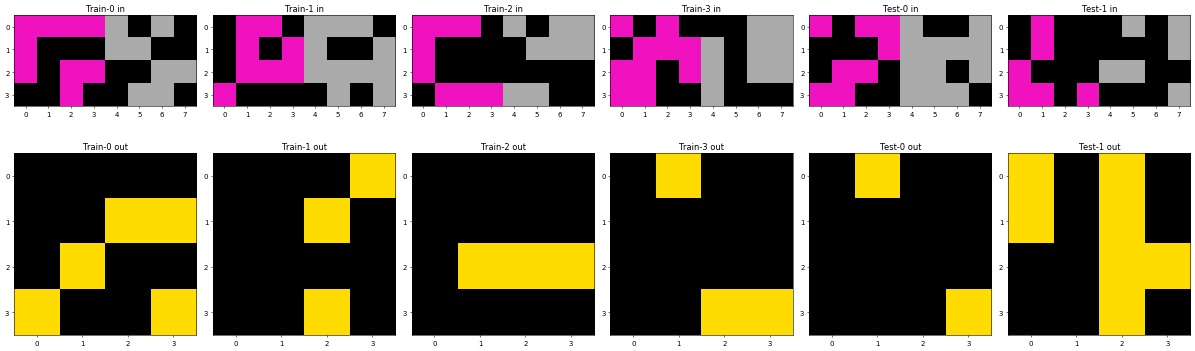

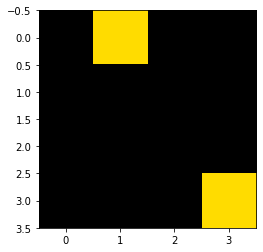

344 1


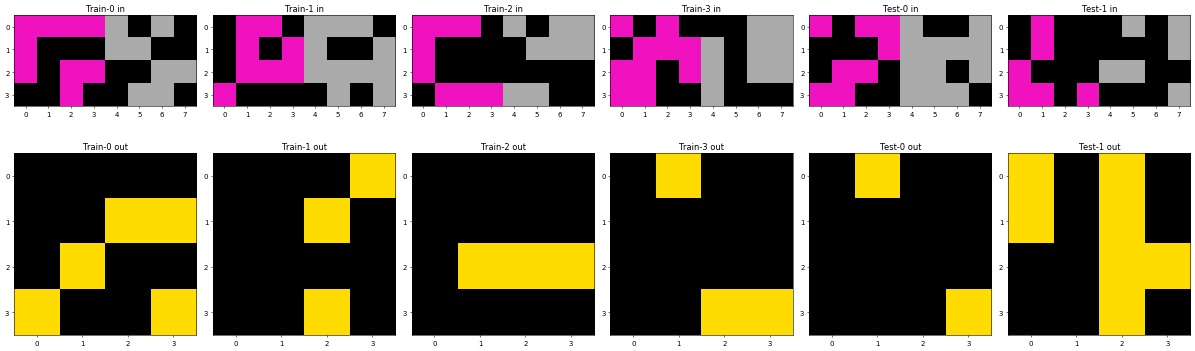

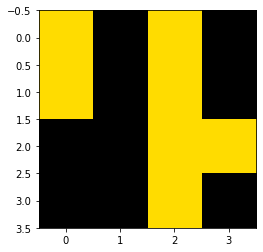

In [37]:

for i in range(400):
    task = Evals[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=Solve_logtic(basic_task)
        if a!=-1 and task['test'][j]['output'] == a:
            print(i,j)
            plot_task(task)
            plot_picture(a)
            vals_id.add(i)

In [38]:
vals_id

{17, 39, 80, 86, 121, 144, 157, 318, 339, 344}

In [39]:
len(vals_id)

10

In [41]:
list(solved_id)

[385, 226, 5, 71, 359, 394, 235, 143, 371, 25, 346, 317]

In [42]:
list(vals_id)

[39, 80, 17, 144, 339, 86, 344, 121, 157, 318]